Wybieramy temat. Może być to temat z pierwszego projektu. Jeśli pozostajemy przy tym 
samym temacie musimy znaleźć zmienną celu. 
2. Dokonujemy eksploracji zbioru. Uzupełniamy braki danych. Dokonujemy wstępnej selekcji 
zmiennych.   
3. Dzielimy zbiór danych na treningowy testowy i w miarę możliwości na walidacyjny. 
4. Tworzymy minimum 3 modele predykcyjne (może być ich więcej) wraz z dostrojeniem 
hiperparametrów. 
5. Porównać i wybrać najlepszy model. 
6. Dokonać ostatecznej oceny wybranego modelu na zbiorze walidacyjnym. 
7. Wskazać uzysk dla firmy / odbiorcy (np. ile pieniędzy z tego będzie miała, jak wdrożenie 
wpłynie na rozpoznawalność przypadków, dla których firma wykona działania prewencyjne 
itd.) 
8. Stworzenie aplikacji wykorzystującej model 
9. Na prezentacji powinna znaleźć się krótka analiza zmiennych, omówienie wyników 
wszystkich zastosowanych technik modelowania i ich porównanie, wybór modelu i przede 
wszystkim wartość dodana jaką niesie za sobą wdrożenie

4. Odejdzie  czy nie odejdzie?  – prognozowanie zjawiska churn wśród Klientów telecom  
• Prognozowanie czy jest zagrożenie, że Klient zrezygnuje z usług firmy 
• Aplikacja dla pracowników informująca o zagrożeniu odejścia Klienta 
• https://www.kaggle.com/blastchar/telco-customer-churn 
 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df["StreamingMovies"].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [11]:
df["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [12]:
print("nowych klientów którzy są z nami od miesiąca jest 613")
print("362 klientów jest z nami od 72 miesięcy")

nowych klientów którzy są z nami od miesiąca jest 613
362 klientów jest z nami od 72 miesięcy


c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

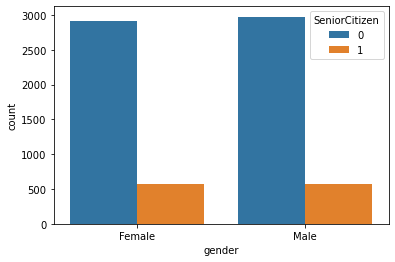

In [13]:
sns.countplot(df['gender'],hue=df["SeniorCitizen"])

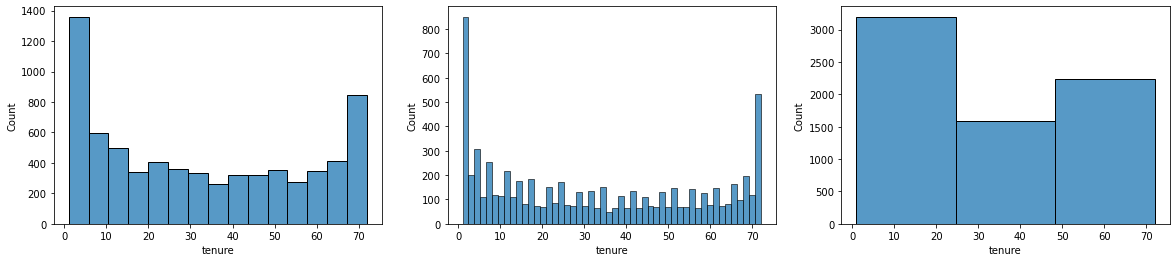

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
sns.histplot(df["tenure"], ax=ax1)
sns.histplot(df["tenure"], bins = 50, ax = ax2)
sns.histplot(df["tenure"], bins = 3, ax = ax3);

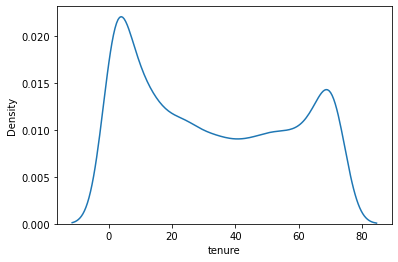

In [15]:
sns.kdeplot(df["tenure"]);

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


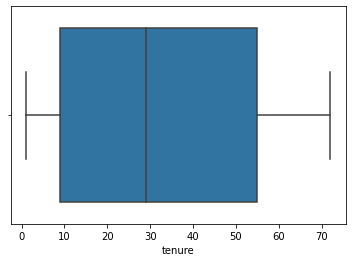

In [16]:
sns.boxplot(df["tenure"]);

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


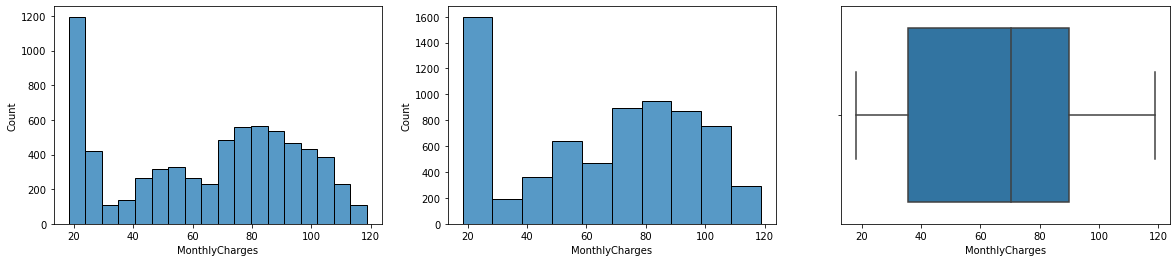

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
sns.histplot(df["MonthlyCharges"], ax = ax1)
sns.histplot(df["MonthlyCharges"], bins = 10, ax = ax2)
sns.boxplot(df["MonthlyCharges"], ax=ax3);

In [18]:
df_d = df.drop("customerID", axis = 1)

In [19]:
df_d['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_d['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [20]:
def apply_scalers(df, columns_to_exclude=None):
    if columns_to_exclude:
        exclude_filter = ~df.columns.isin(columns_to_exclude) 
    else:
        exclude_filter = ~df.columns.isin([]) 
    for column in df.iloc[:, exclude_filter].columns:
        df[column] = df[column].astype(float)
 
    df.loc[:, exclude_filter] = StandardScaler().fit_transform(df.loc[:, exclude_filter])
    return df
 
df_d = apply_scalers(df_d, columns_to_exclude=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])

In [21]:
dummies_df = pd.get_dummies(df_d)

In [22]:
corr_df = dummies_df.corr()

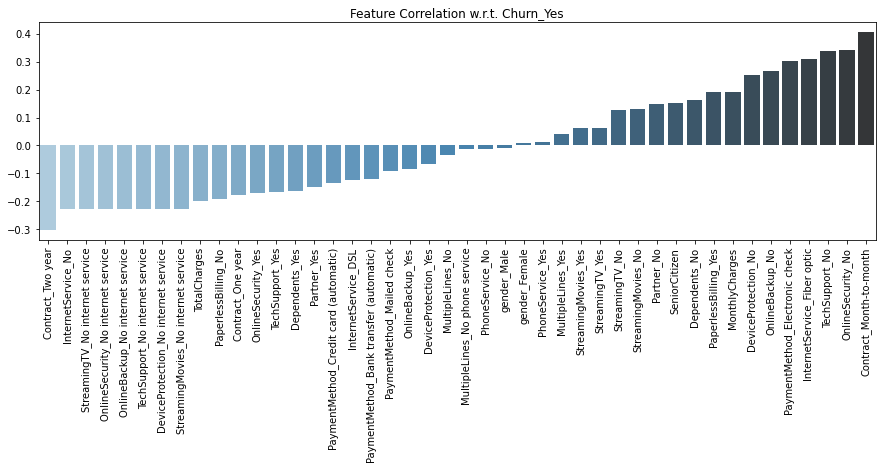

In [24]:
plt.figure(figsize=(15,4))
sns.barplot(x= corr_df['Churn'].sort_values().iloc[1:-1].index, y= corr_df['Churn'].sort_values().iloc[1:-1].values, palette= 'Blues_d')
plt.title("Feature Correlation w.r.t. Churn_Yes")
plt.xticks(rotation= 90);

In [26]:
corr_df['Churn'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
InternetService_No                        -0.227578
StreamingTV_No internet service           -0.227578
OnlineSecurity_No internet service        -0.227578
OnlineBackup_No internet service          -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

# PCA

Zmiana Data Frame na format dummies w celu przeprowadzenia feature engineering

In [24]:
#drop costumer ID 
df_d = df.drop("customerID", axis = 1)

In [25]:
dummies_df = pd.get_dummies(df_d)

In [26]:
dummies_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


# Skalowanie

Skalowanie do 0-1

In [27]:
def apply_scalers(df, columns_to_exclude=None):
    if columns_to_exclude:
        exclude_filter = ~df.columns.isin(columns_to_exclude) 
    else:
        exclude_filter = ~df.columns.isin([]) 
    for column in df.iloc[:, exclude_filter].columns:
        df[column] = df[column].astype(float)
 
    df.loc[:, exclude_filter] = StandardScaler().fit_transform(df.loc[:, exclude_filter])
    return df
 
df_PCA = apply_scalers(dummies_df, columns_to_exclude=['Nazwa'])

In [28]:
df_PCA.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,-0.440327,-1.280248,-1.161694,-0.994194,1.009430,-1.009430,-1.035617,1.035617,0.652305,-0.652305,...,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604,0.601663,-0.601663
1,-0.440327,0.064303,-0.260878,-0.173740,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,...,1.943495,-0.561364,1.206361,-1.206361,-0.529976,-0.525351,-0.711863,1.839576,0.601663,-0.601663
2,-0.440327,-1.239504,-0.363923,-0.959649,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,...,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576,-1.662059,1.662059
3,-0.440327,0.512486,-0.747850,-0.195248,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,...,1.943495,-0.561364,1.206361,-1.206361,1.886879,-0.525351,-0.711863,-0.543604,0.601663,-0.601663
4,-0.440327,-1.239504,0.196178,-0.940457,1.009430,-1.009430,0.965608,-0.965608,0.652305,-0.652305,...,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604,-1.662059,1.662059


# fitowanie PCA

In [29]:
# kolumny do wykluczenia (te na których nie chcemy PCA)
exclude_filter = ~df_PCA.columns.isin(['Churn_Yes']) 
# liczba głównych składowych
pca = PCA(n_components = 4)
# przeliczenie
principal_components = pca.fit_transform(df_PCA.loc[:, exclude_filter])

In [30]:
principal_df = pd.DataFrame(data = principal_components, 
                           columns = ['component 1', 'component 2', 'component 3', 'component 4'])
 
#principal_df['Churn_Yes'] = df_PCA['Churn_Yes']
principal_df

,component 1,component 2,component 3,component 4
0,-1.961200,-2.763215,4.719285,1.227143
1,-0.273680,-0.982653,2.016004,-1.209617
2,-1.025552,-3.042382,1.099264,-1.162767
3,-0.967542,0.234510,6.432821,1.963393
4,-2.028559,-4.408308,-1.367353,-0.569306
...,...,...,...,...
7027,-1.122480,3.185612,0.990530,-1.140905
7028,-2.281997,4.381417,-1.666493,-0.338387
7029,-1.611891,-2.005065,5.578151,-0.813114
7030,-2.150922,-2.941169,-1.380680,-1.275343


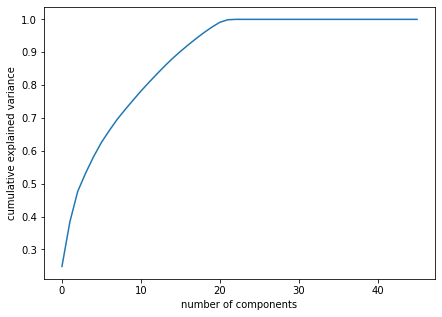

In [31]:
import numpy as np

pca = PCA().fit(df_PCA.loc[:, exclude_filter])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gcf().set_size_inches(7, 5)
 

In [32]:
pca = PCA(svd_solver='full', n_components=0.95)
principal_components = pca.fit_transform(df_PCA.loc[:, exclude_filter])
principal_df = pd.DataFrame(data=principal_components)
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.961200,-2.763215,4.719231,1.225994,2.773150,1.734590,-2.073623,-0.832254,1.570325,-1.173902,-0.138821,0.527529,0.234130,-0.337970,-1.055338,-0.408948,-0.050736,0.902953,-0.017683
1,-0.273680,-0.982653,2.015839,-1.210914,-3.510919,-1.681683,1.085610,0.770263,1.048798,2.208455,-0.188735,0.071433,1.440486,2.140944,0.281076,0.666512,-0.371722,0.840372,-0.778433
2,-1.025552,-3.042381,1.099128,-1.162123,-2.140011,-1.271224,-0.651587,-2.180771,0.685753,-1.796811,-0.039863,-0.679818,1.699754,0.967780,0.710104,1.383827,-0.001971,0.147150,0.724228
3,-0.967542,0.234509,6.432857,1.961310,-1.611749,-1.454358,-0.349806,1.039118,0.177219,2.516383,1.719819,0.073192,0.080408,0.957994,-0.100271,-1.681128,-0.010863,-1.870274,-0.266304
4,-2.028559,-4.408308,-1.367296,-0.569999,-0.131941,1.454847,0.112693,-0.656206,-0.236783,0.144753,-0.076366,0.426805,0.111468,-0.262681,0.087312,-1.176405,0.056353,-0.148983,-1.068372


# Grid Search

In [33]:
model_df = dummies_df.drop("Churn_No", axis = 1)
model_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-0.440327,-1.280248,-1.161694,-0.994194,1.009430,-1.009430,-1.035617,1.035617,0.652305,-0.652305,...,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604,-0.601663
1,-0.440327,0.064303,-0.260878,-0.173740,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,...,-1.107895,1.943495,-0.561364,1.206361,-1.206361,-0.529976,-0.525351,-0.711863,1.839576,-0.601663
2,-0.440327,-1.239504,-0.363923,-0.959649,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,...,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576,1.662059
3,-0.440327,0.512486,-0.747850,-0.195248,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,...,-1.107895,1.943495,-0.561364,1.206361,-1.206361,1.886879,-0.525351,-0.711863,-0.543604,-0.601663
4,-0.440327,-1.239504,0.196178,-0.940457,1.009430,-1.009430,0.965608,-0.965608,0.652305,-0.652305,...,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604,1.662059


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

In [35]:
X = model_df.drop("Churn_Yes", axis = 1)
y = model_df["Churn_Yes"]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42 )

In [37]:
X_train.shape

(5625, 45)

In [38]:
X_test.shape

(1407, 45)

In [39]:
model_params = {
    "svm":{
        "model": SVC(gamma="auto"),
        "params": {
            "C": [1,10,20],
            "kernel": ["linear","rbf"]
        }
    },
    "random_forest":{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
        
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(random_state=0),
        'params':{
             'max_depth':[3,4,5]
        }
    }
}

In [40]:
scores =[]

In [41]:
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best score': clf.best_score_,
        'best params': clf.best_params_ })

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\Leno

ValueError: Unknown label type: 'continuous'

In [ ]:
best_model_df = pd.DataFrame(scores,columns=["model","best score","best params"])

In [ ]:
best_model_df

,model,best score,best params
0,svm,0.797156,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.780978,{'n_estimators': 10}
2,logistic_regression,0.807289,{'C': 5}
3,decision_tree,0.794489,{'max_depth': 5}
